In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer = pd.read_csv('dim_customers.csv')
spend = pd.read_csv('fact_spends.csv')

customer.head()

,customer_id,age_group,city,occupation,gender,marital status,avg_income
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523
1,ATQCUS0809,25-34,Hyderabad,Salaried Other Employees,Male,Married,39922
2,ATQCUS0663,25-34,Chennai,Salaried Other Employees,Male,Married,37702
3,ATQCUS0452,25-34,Delhi NCR,Government Employees,Male,Married,54090
4,ATQCUS3350,21-24,Bengaluru,Freelancers,Male,Single,28376


In [3]:
customer.tail()

,customer_id,age_group,city,occupation,gender,marital status,avg_income
3995,ATQCUS3035,45+,Delhi NCR,Business Owners,Female,Married,72805
3996,ATQCUS2585,35-45,Mumbai,Salaried Other Employees,Female,Married,41343
3997,ATQCUS1229,35-45,Bengaluru,Salaried IT Employees,Male,Married,65948
3998,ATQCUS0581,25-34,Bengaluru,Government Employees,Male,Married,52589
3999,ATQCUS3477,25-34,Mumbai,Business Owners,Male,Single,73541


In [4]:
spend.head()

,customer_id,month,category,payment_type,spend
0,ATQCUS1371,July,Health & Wellness,Credit Card,1114
1,ATQCUS0368,October,Groceries,Credit Card,1466
2,ATQCUS0595,May,Health & Wellness,Credit Card,387
3,ATQCUS0667,October,Electronics,Credit Card,1137
4,ATQCUS3477,September,Bills,UPI,2102


In [5]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     4000 non-null   object
 1   age_group       4000 non-null   object
 2   city            4000 non-null   object
 3   occupation      4000 non-null   object
 4   gender          4000 non-null   object
 5   marital status  4000 non-null   object
 6   avg_income      4000 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 218.9+ KB


In [6]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864000 entries, 0 to 863999
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   customer_id   864000 non-null  object
 1   month         864000 non-null  object
 2   category      864000 non-null  object
 3   payment_type  864000 non-null  object
 4   spend         864000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 33.0+ MB


In [7]:
customer.isnull().sum()

customer_id       0
age_group         0
city              0
occupation        0
gender            0
marital status    0
avg_income        0
dtype: int64

In [8]:
spend.isnull().sum()

customer_id     0
month           0
category        0
payment_type    0
spend           0
dtype: int64

In [9]:
customer.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3995    False
3996    False
3997    False
3998    False
3999    False
Length: 4000, dtype: bool

In [10]:
print(customer['age_group'].max())
print(customer['age_group'].min())

45+
21-24


In [11]:
merge_data = pd.merge(customer,spend,on = 'customer_id')
merge_data

,customer_id,age_group,city,occupation,gender,marital status,avg_income,month,category,payment_type,spend
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Electronics,Net Banking,405
1,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Groceries,Debit Card,1096
2,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,June,Bills,Credit Card,2765
3,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,September,Apparel,Debit Card,363
4,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Food,Debit Card,334
...,...,...,...,...,...,...,...,...,...,...,...
863995,ATQCUS3477,25-34,Mumbai,Business Owners,Male,Single,73541,May,Bills,Net Banking,548
863996,ATQCUS3477,25-34,Mumbai,Business Owners,Male,Single,73541,October,Apparel,UPI,174
863997,ATQCUS3477,25-34,Mumbai,Business Owners,Male,Single,73541,September,Food,Debit Card,346
863998,ATQCUS3477,25-34,Mumbai,Business Owners,Male,Single,73541,June,Apparel,Net Banking,54


In [12]:
merge_data.isnull().sum()

customer_id       0
age_group         0
city              0
occupation        0
gender            0
marital status    0
avg_income        0
month             0
category          0
payment_type      0
spend             0
dtype: int64

In [13]:
spend_by_age_grp = round(merge_data.groupby(['age_group','gender']).agg({'spend':'mean','avg_income':'mean'}).reset_index(),2)
spend_by_age_grp

,age_group,gender,spend,avg_income
0,21-24,Female,442.63,41238.52
1,21-24,Male,468.85,40410.20
2,25-34,Female,583.64,51830.86
3,25-34,Male,653.18,51825.01
4,35-45,Female,651.32,54201.82
5,35-45,Male,715.42,53017.56
6,45+,Female,538.63,60395.47
7,45+,Male,612.41,61361.94


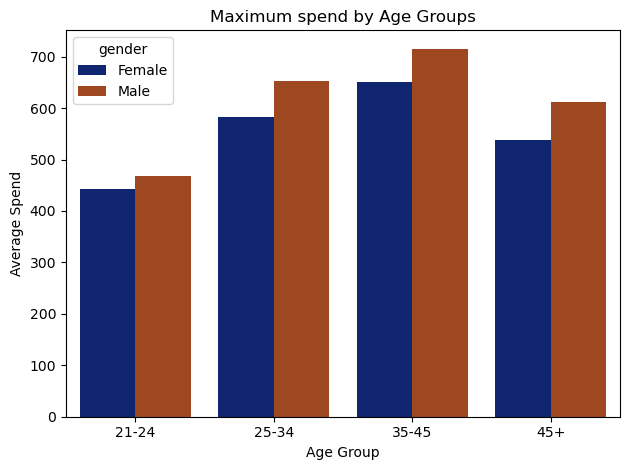

In [14]:
sns.barplot(data=spend_by_age_grp,x='age_group',y='spend',hue= 'gender',palette='dark')
plt.title('Maximum spend by Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Average Spend')
plt.tight_layout()
plt.show()

In [15]:
# INSIGHT: Age group between 35-45 'male' is spending more

In [16]:
spend_by_gender = merge_data.groupby(['gender']).agg({'spend':'mean'}).reset_index()
spend_by_gender

,gender,spend
0,Female,573.373584
1,Male,636.664166


In [17]:
spend_by_occupation = merge_data.groupby(['occupation','gender']).agg({'spend':'mean'}).reset_index()
spend_by_occupation

,occupation,gender,spend
0,Business Owners,Female,562.492199
1,Business Owners,Male,667.977533
2,Freelancers,Female,398.823190
3,Freelancers,Male,462.136926
4,Government Employees,Female,374.664931
5,Government Employees,Male,446.495333
6,Salaried IT Employees,Female,790.544495
7,Salaried IT Employees,Male,936.688967
8,Salaried Other Employees,Female,408.266335
9,Salaried Other Employees,Male,483.247587


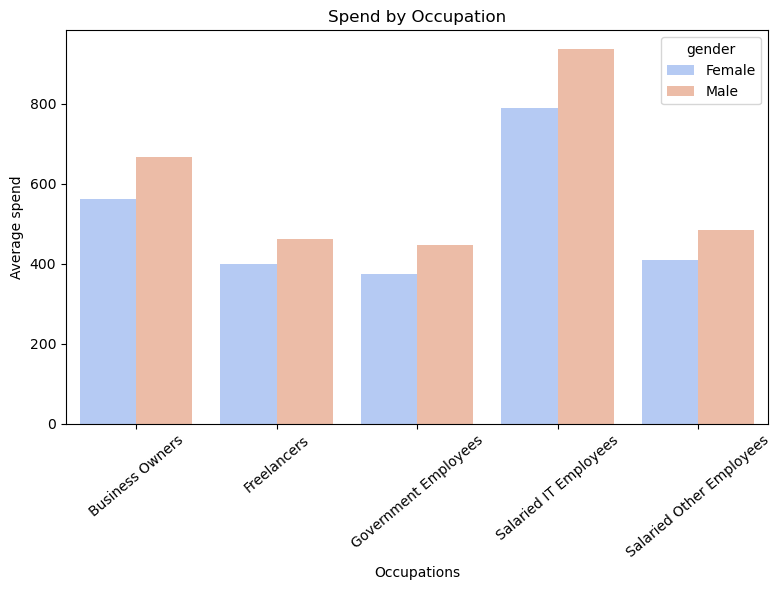

In [112]:
plt.figure(figsize=(8,6))
sns.barplot(data = spend_by_occupation,x = 'occupation',y = 'spend',hue = 'gender',palette = 'coolwarm')
plt.xticks(rotation=40)
plt.title('Spend by Occupation')
plt.xlabel('Occupations')
plt.ylabel("Average spend")
plt.tight_layout()
plt.show()

In [19]:
#INSIGHT: Salaried IT Employees(male) is spending more

In [106]:
spend_by_payment_type = merge_data.groupby(['payment_type','gender']).agg({'spend':'mean'}).sort_values(by='spend',ascending=False).reset_index()
spend_by_payment_type

,payment_type,gender,spend
0,Credit Card,Male,1028.262996
1,Credit Card,Female,951.761134
2,UPI,Male,683.141837
3,UPI,Female,594.239566
4,Debit Card,Male,573.689150
5,Debit Card,Female,516.145429
6,Net Banking,Male,261.562679
7,Net Banking,Female,231.348209


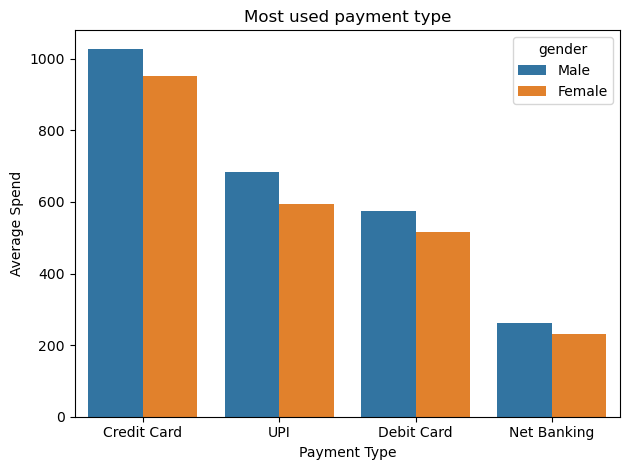

In [107]:
sns.barplot(data=spend_by_payment_type,x='payment_type',y='spend',hue='gender')
plt.title('Most used payment type')
plt.xlabel('Payment Type')
plt.ylabel('Average Spend')
plt.tight_layout()
plt.show()

In [22]:
#INSIGHT: Credit card is the most used payment type followed by UPI

In [104]:
spend_by_city = merge_data.groupby(['city']).agg({'spend':'mean'}).sort_values(by='spend',ascending=False).reset_index()
spend_by_city

,city,spend
0,Mumbai,738.844581
1,Delhi NCR,693.508307
2,Bengaluru,616.573143
3,Hyderabad,527.138959
4,Chennai,443.375905


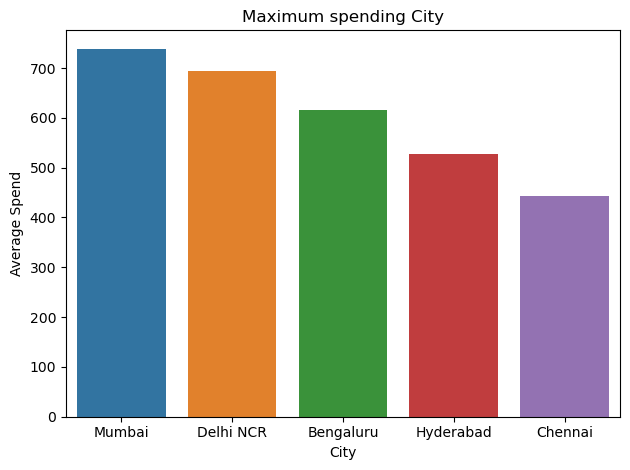

In [105]:
sns.barplot(data=spend_by_city,x='city',y='spend')
plt.title('Maximum spending City')
plt.xlabel('City')
plt.ylabel('Average Spend')
plt.tight_layout()
plt.show()

In [25]:
#INSIGHT: Mumbai is the most spending city followed by Delhi NCR and Begaluru

In [102]:
spend_by_city = merge_data.groupby(['city','gender']).agg({'spend':'mean'}).sort_values(by='spend',ascending=False).reset_index()
spend_by_city

,city,gender,spend
0,Mumbai,Male,766.646732
1,Delhi NCR,Male,719.524105
2,Mumbai,Female,688.800709
3,Delhi NCR,Female,647.836128
4,Bengaluru,Male,639.893948
5,Bengaluru,Female,571.211892
6,Hyderabad,Male,543.973272
7,Hyderabad,Female,493.040887
8,Chennai,Male,461.324841
9,Chennai,Female,410.922777


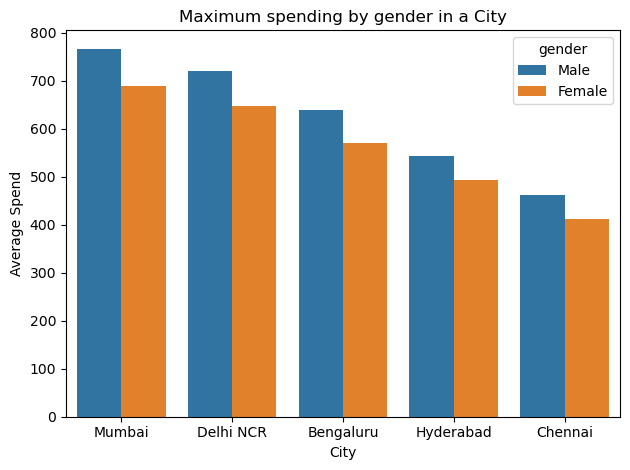

In [103]:
sns.barplot(data=spend_by_city,x='city',y='spend',hue = 'gender')
plt.title('Maximum spending by gender in a City')
plt.xlabel('City')
plt.ylabel('Average Spend')
plt.tight_layout()
plt.show()

In [28]:
#INSIGHT: Male are spending more than Female in Mumbai

In [101]:
spend_by_city = merge_data.groupby(['city','payment_type']).agg({'spend':'mean'}).sort_values(by='spend',ascending=False).reset_index()
spend_by_city

,city,payment_type,spend
0,Mumbai,Credit Card,1195.056861
1,Delhi NCR,Credit Card,1141.135952
2,Bengaluru,Credit Card,991.553608
3,Hyderabad,Credit Card,860.539410
4,Mumbai,UPI,791.379578
5,Chennai,Credit Card,735.595679
6,Delhi NCR,UPI,733.764934
7,Mumbai,Debit Card,665.178846
8,Bengaluru,UPI,654.226685
9,Delhi NCR,Debit Card,619.487331


In [30]:
#INSIGHT: Credit Card is been used more for spending in Mumbai

In [31]:
merge_data['income_utilization'] = merge_data['spend']/merge_data['avg_income']
merge_data

,customer_id,age_group,city,occupation,gender,marital status,avg_income,month,category,payment_type,spend,income_utilization
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Electronics,Net Banking,405,0.005508
1,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Groceries,Debit Card,1096,0.014907
2,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,June,Bills,Credit Card,2765,0.037607
3,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,September,Apparel,Debit Card,363,0.004937
4,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Food,Debit Card,334,0.004543
...,...,...,...,...,...,...,...,...,...,...,...,...
863995,ATQCUS3477,25-34,Mumbai,Business Owners,Male,Single,73541,May,Bills,Net Banking,548,0.007452
863996,ATQCUS3477,25-34,Mumbai,Business Owners,Male,Single,73541,October,Apparel,UPI,174,0.002366
863997,ATQCUS3477,25-34,Mumbai,Business Owners,Male,Single,73541,September,Food,Debit Card,346,0.004705
863998,ATQCUS3477,25-34,Mumbai,Business Owners,Male,Single,73541,June,Apparel,Net Banking,54,0.000734


In [95]:
Avg_income_utilization = round(merge_data.groupby(['occupation','avg_income'])['income_utilization'].mean().sort_values(ascending=False).reset_index(),2)
Avg_income_utilization

,occupation,avg_income,income_utilization
0,Salaried IT Employees,63625,0.02
1,Salaried IT Employees,65630,0.02
2,Salaried IT Employees,58558,0.02
3,Salaried IT Employees,68895,0.02
4,Salaried IT Employees,58736,0.02
...,...,...,...
3871,Government Employees,61997,0.00
3872,Business Owners,76796,0.00
3873,Government Employees,39072,0.00
3874,Government Employees,38867,0.00


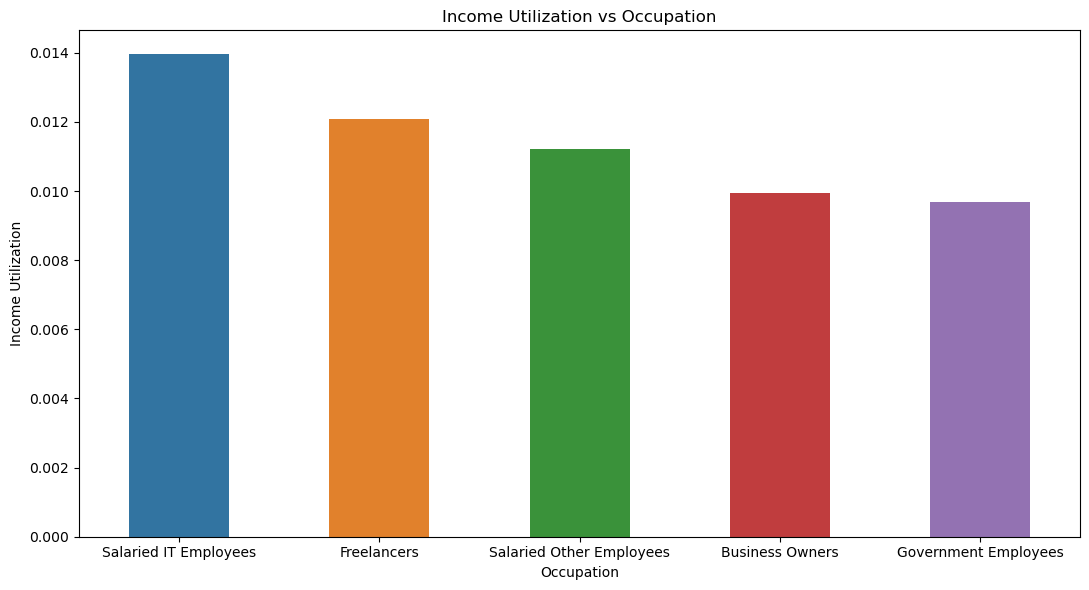

In [97]:
plt.figure(figsize=(11,6))
sns.barplot(data=Avg_income_utilization,x='occupation',y='income_utilization',errorbar= None,width = 0.5)
plt.title('Income Utilization vs Occupation')
plt.xlabel('Occupation')
plt.ylabel('Income Utilization')
#plt.grid(True)
plt.tight_layout()
plt.show()

In [46]:
#INSIGHT: Salaried IT employees utilize more income followed by Freelancers and Salaried Other employees

,customer_id,age_group,city,occupation,gender,marital status,avg_income,month,category,payment_type,spend,income_utilization
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Electronics,Net Banking,405,0.005508
1,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Groceries,Debit Card,1096,0.014907
2,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,June,Bills,Credit Card,2765,0.037607
3,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,September,Apparel,Debit Card,363,0.004937
4,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Food,Debit Card,334,0.004543


In [90]:
income_utilization_by_category = merge_data.groupby(['category'])['income_utilization'].mean().sort_values(ascending=False).reset_index()
income_utilization_by_category

,category,income_utilization
0,Bills,0.020633
1,Groceries,0.017173
2,Electronics,0.016271
3,Health & Wellness,0.012975
4,Travel,0.011748
5,Food,0.009113
6,Entertainment,0.008990
7,Apparel,0.007241
8,Others,0.003226


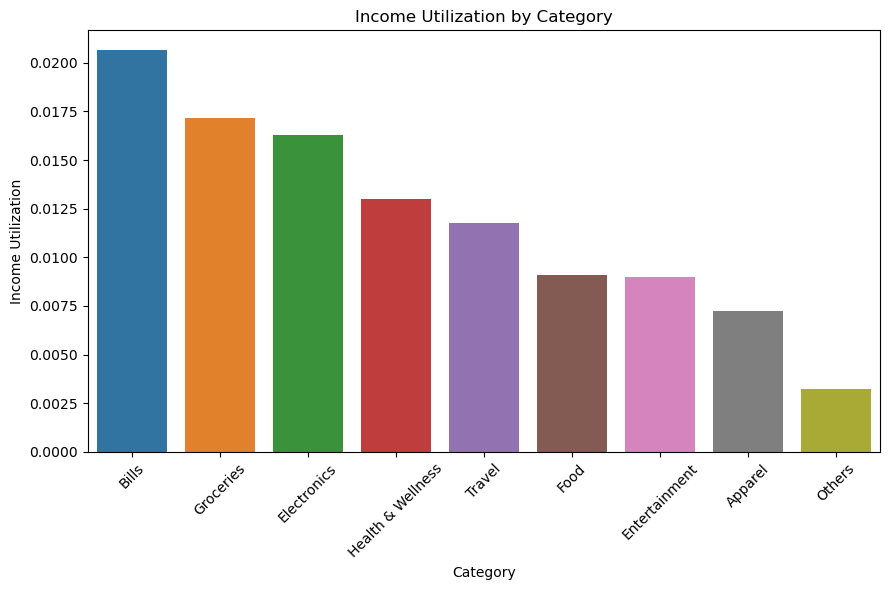

In [94]:
plt.figure(figsize=(9,6))
sns.barplot(data=income_utilization_by_category,x='category',y='income_utilization',errorbar= None)
plt.xticks(rotation=45)
plt.title('Income Utilization by Category')
plt.xlabel('Category')
plt.ylabel('Income Utilization')
plt.tight_layout()
plt.show()

In [ ]:
#INSIGHT: People are spending more on Bills followed by Groceries and Electronics

In [88]:
income_utilization_by_category = merge_data.groupby(['category','payment_type'])['income_utilization'].mean().sort_values(ascending=False).reset_index()
income_utilization_by_category.head(10)

,category,payment_type,income_utilization
0,Bills,Credit Card,0.036158
1,Electronics,Credit Card,0.028331
2,Groceries,UPI,0.023357
3,Health & Wellness,Credit Card,0.021682
4,Groceries,Credit Card,0.021330
5,Travel,Credit Card,0.020906
6,Bills,Debit Card,0.019863
7,Bills,UPI,0.018162
8,Electronics,UPI,0.017903
9,Groceries,Debit Card,0.016900


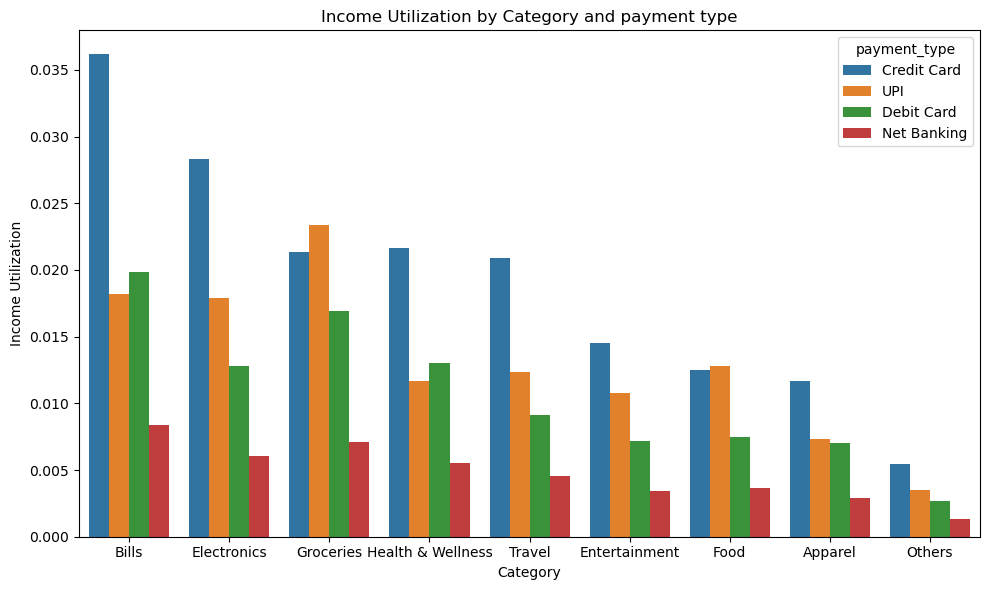

In [89]:
plt.figure(figsize=(10,6))
sns.barplot(data=income_utilization_by_category,x='category',y='income_utilization',errorbar= None,hue='payment_type')
plt.title('Income Utilization by Category and payment type')
plt.xlabel('Category')
plt.ylabel('Income Utilization')
plt.tight_layout()
plt.show()

In [73]:
#INSIGHT: People are using CREDIT CARD more for payment followed by UPI and Debit Card

In [78]:
money_spend = merge_data.groupby(['occupation','category'])['income_utilization'].mean().sort_values(ascending=False).reset_index()
money_spend.head(10)

,occupation,category,income_utilization
0,Freelancers,Bills,0.023469
1,Salaried IT Employees,Bills,0.023088
2,Salaried Other Employees,Bills,0.019930
3,Salaried IT Employees,Groceries,0.019379
4,Freelancers,Groceries,0.019285
5,Salaried IT Employees,Electronics,0.018783
6,Freelancers,Electronics,0.017966
7,Business Owners,Bills,0.017355
8,Salaried Other Employees,Groceries,0.016562
9,Salaried IT Employees,Health & Wellness,0.016518


In [85]:
spend_by_month = merge_data.groupby(['month','payment_type'])['spend'].mean().sort_values(ascending=False).reset_index()
spend_by_month.head(10)

,month,payment_type,spend
0,September,Credit Card,1312.820167
1,August,Credit Card,1141.181611
2,October,Credit Card,973.656056
3,July,Credit Card,912.161861
4,June,Credit Card,897.490389
5,September,UPI,854.579778
6,May,Credit Card,771.269722
7,August,UPI,743.095139
8,September,Debit Card,724.209444
9,October,UPI,633.785528


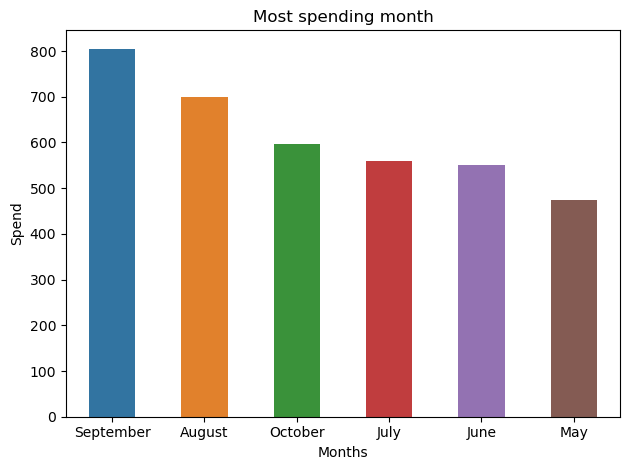

In [87]:
sns.barplot(data=spend_by_month,x='month',y='spend',width=0.5,errorbar=None)
plt.title('Most spending month')
plt.xlabel('Months')
plt.ylabel('Spend')
plt.tight_layout()
plt.show()

In [ ]:
#INSIGHT: Age group between 35-45 'male' is spending more
#INSIGHT: Salaried IT Employees(male) is spending more
#INSIGHT: Credit card is the most used payment type followed by UPI
#INSIGHT: Mumbai is the most spending city followed by Delhi NCR and Begaluru
#INSIGHT: Male are spending more than Female in Mumbai
#INSIGHT: Credit Card is been used more for spending in Mumbai
#INSIGHT: Salaried IT employees utilize more income followed by Freelancers and Salaried Other employees
#INSIGHT: People are spending more on Bills followed by Groceries and Electronics
#INSIGHT: People are using CREDIT CARD more for payment followed by UPI and Debit Card 